__IMPORTS__

In [1]:
#import os
import IGIMF4
import numpy as np
import pandas as pd

In [2]:
#print(os.getcwd())

__INITIAL PARAMETERS__

In [3]:
# Parameters evaluated at time t

metal_mass_fraction = 1e-1 * 0.0142
M_igal = 1e10

In [4]:
# Grids

#mstar_v = np.logspace(-2,np.log10(3.6e3),num=50)
mstar_v = np.logspace(np.log10(0.07),np.log10(150), num=50)
print(f'{mstar_v=}')
print(f'{np.where(mstar_v<0.08)=}')
print(f'{np.where(mstar_v>150)=}\n')

Mecl_v = np.logspace(np.log10(5),10,num=50)
print(f'{Mecl_v=}')
print(f'{np.where(Mecl_v<5)=}')
print(f'{np.where(Mecl_v>5e9)=}\n')

Z_massfrac_v = np.logspace(-9,-1,num=40)
print(f'{Z_massfrac_v=}')
print(f'{np.where(Z_massfrac_v<1e-5)=}')
print(f'{np.where(Z_massfrac_v>0.0142)=}\n')

mstar_v=array([7.00000000e-02, 8.73464120e-02, 1.08991367e-01, 1.36000069e-01,
       1.69701687e-01, 2.11754764e-01, 2.64228840e-01, 3.29706302e-01,
       4.11409465e-01, 5.13359151e-01, 6.40572571e-01, 7.99310224e-01,
       9.97384002e-01, 1.24454163e+00, 1.55294637e+00, 1.93777562e+00,
       2.41796782e+00, 3.01715448e+00, 3.76482312e+00, 4.69776845e+00,
       5.86190312e+00, 7.31451721e+00, 9.12709763e+00, 1.13888461e+01,
       1.42110692e+01, 1.77326558e+01, 2.21269123e+01, 2.76100914e+01,
       3.44520346e+01, 4.29894516e+01, 5.36424907e+01, 6.69354156e+01,
       8.35224055e+01, 1.04219749e+02, 1.30046016e+02, 1.62272185e+02,
       2.02484187e+02, 2.52660961e+02, 3.15271834e+02, 3.93398050e+02,
       4.90884402e+02, 6.12528446e+02, 7.64316600e+02, 9.53718752e+02,
       1.19005587e+03, 1.48495872e+03, 1.85294023e+03, 2.31210973e+03,
       2.88506413e+03, 3.60000000e+03])
np.where(mstar_v<0.08)=(array([0]),)
np.where(mstar_v>150)=(array([35, 36, 37, 38, 39, 40, 41, 42, 4

__DOWNSIZING CLASS__

In [5]:
downsizing_obj = IGIMF4.Downsizing(M_igal)

In [6]:
downsizing_obj.downsizing_time

0.9689945113416355

In [7]:
downsizing_obj.M_igal

10000000000.0

In [8]:
downsizing_obj.SFR

10.319975895585161

__IGIMF CLASS__

In [9]:
igimf4_obj = IGIMF4.IGIMF(metal_mass_fraction, downsizing_obj.SFR)

In [10]:
igimf4_obj.alpha_1

0.4948600000000001

In [11]:
igimf4_obj.alpha_2

1.49486

In [12]:
igimf4_obj.SFR

10.319975895585161

In [13]:
igimf4_obj.Mtot

103199758.95585161

In [14]:
ECMF_res = igimf4_obj.ECMF()

In [15]:
ECMF_v = ECMF_res[2](Mecl_v)

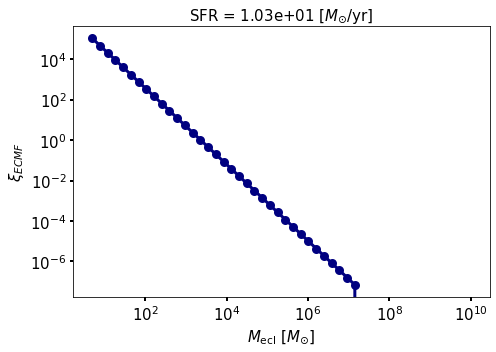

In [16]:
igimf4_obj.ECMF_plot(Mecl_v, ECMF_v)

In [17]:
SFR_v = np.logspace(-4,3,num=10)
print(f"{SFR_v=}")

SFR_v=array([1.00000000e-04, 5.99484250e-04, 3.59381366e-03, 2.15443469e-02,
       1.29154967e-01, 7.74263683e-01, 4.64158883e+00, 2.78255940e+01,
       1.66810054e+02, 1.00000000e+03])


In [18]:
ECMF_v_list = []
beta_ECMF_list = []
MeclMax_list = []
for S in SFR_v:
    igimf4 = IGIMF4.IGIMF(metal_mass_fraction, S)
    beta_ECMF_list.append(igimf4.beta_ECMF)
    #print(f'SFR={S}, beta={igimf4.beta_ECMF}')
    ECMF_res = igimf4.ECMF()
    ECMF_v = ECMF_res[2](Mecl_v)
    MeclMax_list.append(ECMF_res[1])
    ECMF_v_list.append(ECMF_v)
    #igimf4.ECMF_plot(Mecl_v, ECMF_v)

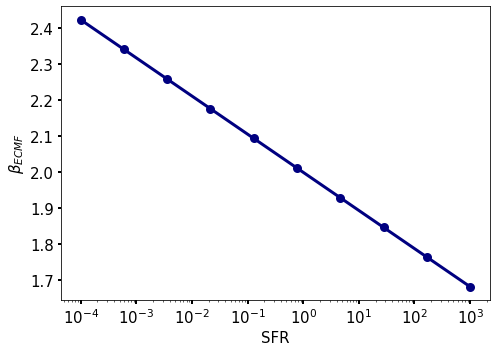

In [19]:
igimf4.beta_ECMF_plot(SFR_v, beta_ECMF_list)

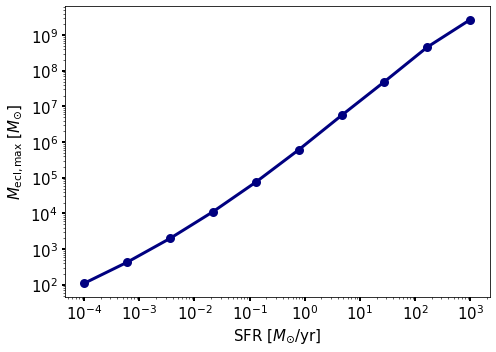

In [20]:
igimf4_obj.MeclMax_plot(SFR_v, MeclMax_list)

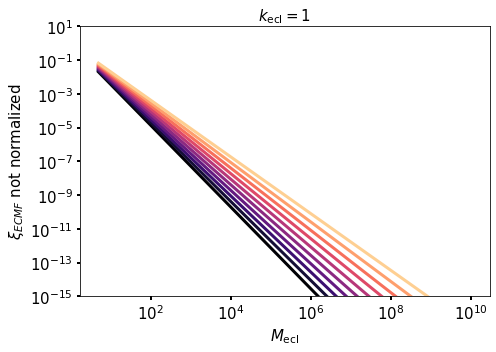

In [21]:
igimf4_obj.Mecl_power_beta_plot(Mecl_v, beta_ECMF_list, SFR_v)

<Figure size 432x288 with 0 Axes>

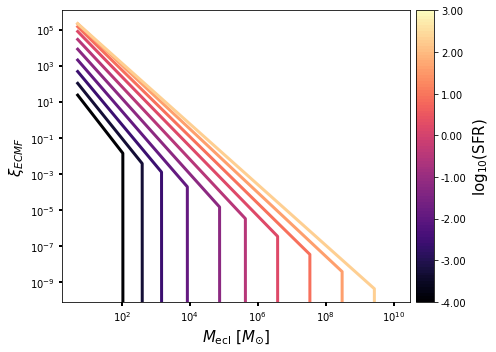

In [22]:
igimf4_obj.ECMF_plots(Mecl_v, ECMF_v_list, SFR_v)

In [23]:
Mtot_IMF = 1e2
sIMF = igimf4_obj.stellar_IMF(Mtot_IMF)

Mtot = 100.0,	 m_max = 12.768565942226754,	 k(m_max)=35.66249473600422


In [24]:
IMF_v = sIMF[2](mstar_v)

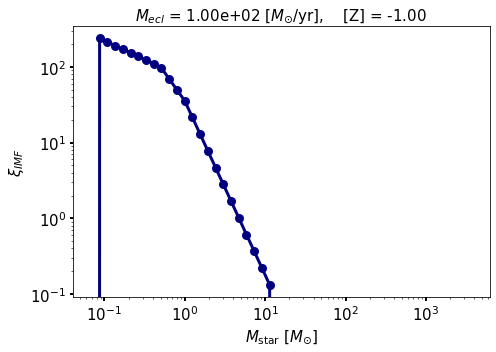

In [25]:
igimf4_obj.IMF_plot(mstar_v, IMF_v, Mtot_IMF)

In [26]:
IMF_v_list = []
m_max_list = []
k_IMF_list = []
for M in Mecl_v:
    igimf4 = IGIMF4.IGIMF(metal_mass_fraction, downsizing_obj.SFR)
    sIMF = igimf4.stellar_IMF(M)
    print (f"M=%.2e,\t alpha1=%.2f,\t alpha2=%.2f,\t alpha3=%.2f,\t m_max = %.2e,\t [Z] = %.2f"%(M, sIMF[4], sIMF[5], sIMF[6], sIMF[1], igimf4.metallicity))
    IMF_v = sIMF[2](mstar_v)
    m_max_list.append(sIMF[1])
    k_IMF_list.append(sIMF[0])
    IMF_v_list.append(IMF_v)
    #igimf4.ECMF_plot(Mecl_v, ECMF_v)

Mtot = 5.000000000000001,	 m_max = 1.9405321210777102,	 k(m_max)=3.0779738370110823
M=5.00e+00,	 alpha1=0.49,	 alpha2=1.49,	 alpha3=2.30,	 m_max = 1.94e+00,	 [Z] = -1.00
Mtot = 7.740819541047465,	 m_max = 2.4878608121812404,	 k(m_max)=4.251587054971164
M=7.74e+00,	 alpha1=0.49,	 alpha2=1.49,	 alpha3=2.30,	 m_max = 2.49e+00,	 [Z] = -1.00
Mtot = 11.984057433412458,	 m_max = 3.2258690231703664,	 k(m_max)=5.959797586140692
M=1.20e+01,	 alpha1=0.49,	 alpha2=1.49,	 alpha3=2.30,	 m_max = 3.23e+00,	 [Z] = -1.00
Mtot = 18.553285192318857,	 m_max = 4.22350487547153,	 k(m_max)=8.460295839777045
M=1.86e+01,	 alpha1=0.49,	 alpha2=1.49,	 alpha3=2.30,	 m_max = 4.22e+00,	 [Z] = -1.00
Mtot = 28.723526513465664,	 m_max = 5.575710399230541,	 k(m_max)=12.140321576439026
M=2.87e+01,	 alpha1=0.49,	 alpha2=1.49,	 alpha3=2.30,	 m_max = 5.58e+00,	 [Z] = -1.00
Mtot = 44.468727064645975,	 m_max = 7.413371896573734,	 k(m_max)=17.58343547120048
M=4.45e+01,	 alpha1=0.49,	 alpha2=1.49,	 alpha3=2.30,	 m_max = 7.41e+0

In [27]:
Mecl_v

array([5.00000000e+00, 7.74081954e+00, 1.19840574e+01, 1.85532852e+01,
       2.87235265e+01, 4.44687271e+01, 6.88448783e+01, 1.06583156e+02,
       1.65008195e+02, 2.55459732e+02, 3.95493537e+02, 6.12288820e+02,
       9.47923453e+02, 1.46754088e+03, 2.27199382e+03, 3.51741883e+03,
       5.44554089e+03, 8.43058986e+03, 1.30519350e+04, 2.02065346e+04,
       3.12830276e+04, 4.84312543e+04, 7.49795199e+04, 1.16080587e+05,
       1.79711775e+05, 2.78223283e+05, 4.30735246e+05, 6.66848761e+05,
       1.03239118e+06, 1.59831077e+06, 2.47444705e+06, 3.83084962e+06,
       5.93078311e+06, 9.18182436e+06, 1.42149691e+07, 2.20071021e+07,
       3.40706012e+07, 5.27468751e+07, 8.16608083e+07, 1.26424316e+08,
       1.95725563e+08, 3.03015253e+08, 4.69117279e+08, 7.26270439e+08,
       1.12438568e+09, 1.74073333e+09, 2.69494052e+09, 4.17220964e+09,
       6.45926439e+09, 1.00000000e+10])

In [28]:
k_IMF_list = np.array(k_IMF_list)
k_idx = np.where(k_IMF_list<=1e10)[0]
print(Mecl_v[k_idx])

[5.00000000e+00 7.74081954e+00 1.19840574e+01 1.85532852e+01
 2.87235265e+01 4.44687271e+01 6.88448783e+01 1.06583156e+02
 1.65008195e+02 2.55459732e+02 3.95493537e+02 6.12288820e+02
 9.47923453e+02 1.46754088e+03 2.27199382e+03 3.51741883e+03
 5.44554089e+03 8.43058986e+03 1.30519350e+04 2.02065346e+04
 3.12830276e+04 4.84312543e+04 7.49795199e+04 1.16080587e+05
 1.79711775e+05 2.78223283e+05 4.30735246e+05 6.66848761e+05
 1.03239118e+06 1.59831077e+06 2.47444705e+06 3.83084962e+06
 5.93078311e+06 9.18182436e+06 1.42149691e+07 2.20071021e+07
 3.40706012e+07 5.27468751e+07 8.16608083e+07 1.26424316e+08
 1.95725563e+08 3.03015253e+08 4.69117279e+08 7.26270439e+08
 1.12438568e+09 1.74073333e+09 2.69494052e+09 4.17220964e+09
 6.45926439e+09 1.00000000e+10]


<Figure size 432x288 with 0 Axes>

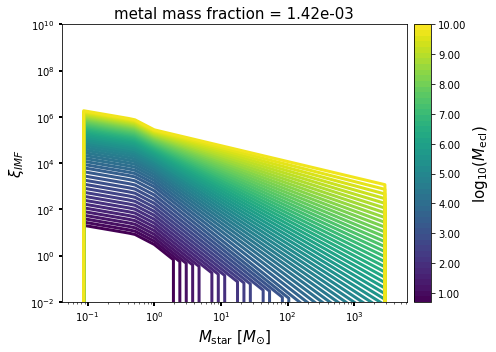

In [29]:
igimf4_obj.IMF_plots(mstar_v, IMF_v_list, Mecl_v, k_idx, metal_mass_fraction)

In [30]:
#igimf4_obj.IMF_plots(mstar_v, IMF_v_list, Mecl_v, k_IMF_list, metal_mass_fraction)

In [31]:
IMF_v_Z_list = []
alpha1_Z_list = []
alpha3_Z_list = []
m_max_Z_list = []
k_IMF_Z_list = []
for Z in Z_massfrac_v:
    IMF_v_list = []
    alpha1_list = []
    alpha3_list = []
    m_max_list = []
    k_IMF_list = []
    for M in Mecl_v:
        igimf4 = IGIMF4.IGIMF(Z, downsizing_obj.SFR)
        sIMF = igimf4.stellar_IMF(M)
        print (f"M=%.2e,\t alpha1=%.2f,\t alpha2=%.2f,\t alpha3=%.2f,\t m_max = %.2e,\t [Z] = %.2f"%(M, sIMF[4], sIMF[5], sIMF[6], sIMF[1], igimf4.metallicity))
        #IMF_v = sIMF[2](mstar_v)
        alpha1_list.append(sIMF[4])
        alpha3_list.append(sIMF[6])
        m_max_list.append(sIMF[1])
        k_IMF_list.append(sIMF[0])
        IMF_v_list.append(IMF_v)
        #igimf4.ECMF_plot(Mecl_v, ECMF_v)
    IMF_v_Z_list.append(IMF_v_list)
    alpha1_Z_list.append(alpha1_list)
    alpha3_Z_list.append(alpha3_list)
    m_max_Z_list.append(m_max_list)
    k_IMF_Z_list.append(k_IMF_list)
    

Mtot = 5.000000000000001,	 m_max = 1.9826324820799361,	 k(m_max)=3.165070676745936
M=5.00e+00,	 alpha1=0.41,	 alpha2=1.41,	 alpha3=2.30,	 m_max = 1.98e+00,	 [Z] = -7.15
Mtot = 7.740819541047465,	 m_max = 2.538397508443192,	 k(m_max)=4.364209511310417
M=7.74e+00,	 alpha1=0.41,	 alpha2=1.41,	 alpha3=2.30,	 m_max = 2.54e+00,	 [Z] = -7.15
Mtot = 11.984057433412458,	 m_max = 3.2875850684494003,	 k(m_max)=6.108464332412931
M=1.20e+01,	 alpha1=0.41,	 alpha2=1.41,	 alpha3=2.30,	 m_max = 3.29e+00,	 [Z] = -7.15
Mtot = 18.553285192318857,	 m_max = 4.3000376943286875,	 k(m_max)=8.660165288808987
M=1.86e+01,	 alpha1=0.41,	 alpha2=1.41,	 alpha3=2.30,	 m_max = 4.30e+00,	 [Z] = -7.15
Mtot = 28.723526513465664,	 m_max = 5.671914328267675,	 k(m_max)=12.41339721304483
M=2.87e+01,	 alpha1=0.41,	 alpha2=1.41,	 alpha3=2.30,	 m_max = 5.67e+00,	 [Z] = -7.15
Mtot = 44.468727064645975,	 m_max = 7.535759045160476,	 k(m_max)=17.96186063637686
M=4.45e+01,	 alpha1=0.41,	 alpha2=1.41,	 alpha3=2.30,	 m_max = 7.54e+00

In [32]:
Z_massfrac_v

array([1.00000000e-09, 1.60371874e-09, 2.57191381e-09, 4.12462638e-09,
       6.61474064e-09, 1.06081836e-08, 1.70125428e-08, 2.72833338e-08,
       4.37547938e-08, 7.01703829e-08, 1.12533558e-07, 1.80472177e-07,
       2.89426612e-07, 4.64158883e-07, 7.44380301e-07, 1.19377664e-06,
       1.91448198e-06, 3.07029063e-06, 4.92388263e-06, 7.89652287e-06,
       1.26638017e-05, 2.03091762e-05, 3.25702066e-05, 5.22334507e-05,
       8.37677640e-05, 1.34339933e-04, 2.15443469e-04, 3.45510729e-04,
       5.54102033e-04, 8.88623816e-04, 1.42510267e-03, 2.28546386e-03,
       3.66524124e-03, 5.87801607e-03, 9.42668455e-03, 1.51177507e-02,
       2.42446202e-02, 3.88815518e-02, 6.23550734e-02, 1.00000000e-01])

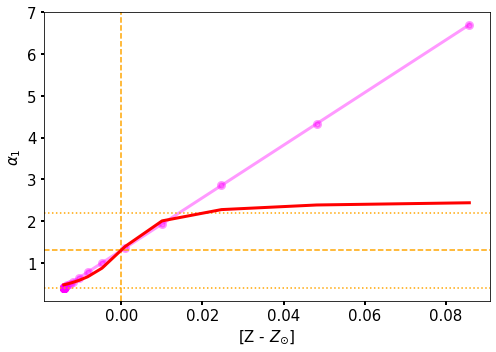

In [33]:
def alpha1_Z_plot(Z_massfrac_v, alpha1_Z_list):
    from matplotlib import pyplot as plt
    import matplotlib.ticker as ticker
    Msun = r'$M_{\odot}$'
    fig, ax = plt.subplots(1,1, figsize=(7,5))
    #ax.plot(np.log10(Z_massfrac_v)-0.0142, [alpha1_Z_list[i][0] for i in range(len(SFR_v))], linewidth=3, color='magenta')
    #ax.scatter(np.log10(Z_massfrac_v)-0.0142, [alpha1_Z_list[i][0] for i in range(len(SFR_v))], linewidth=3, color='magenta')
    ax.plot(Z_massfrac_v- 0.0142, [alpha1_Z_list[i][0] for i in range(len(Z_massfrac_v))], linewidth=3, color='magenta', alpha=0.4)
    ax.scatter(Z_massfrac_v- 0.0142, [alpha1_Z_list[i][0] for i in range(len(Z_massfrac_v))], linewidth=3, color='magenta', alpha=0.4)
    ax.set_ylabel(r'$\alpha_1$', fontsize=15)
    ax.set_xlabel(r'[Z - $Z_{\odot}$]', fontsize=15)
    ax.axhline(1.3 - 63*0.0142, linestyle=':', color='orange')
    ax.axhline(1.3 + 63*0.0142, linestyle=':', color='orange')
    ax.axhline(1.3, linestyle='--', color='orange')
    ax.axvline(0, linestyle='--', color='orange')
    ax.plot(Z_massfrac_v - 0.0142, 1.3 + np.arctan(1.3e2*(Z_massfrac_v - 0.0142))/1.3, color='red', linewidth=3)
    #plt.title(r'SFR = %.2e [%s/yr]' %(self.SFR, Msun), fontsize=15)
    #ax.set_ylim(5e-2,1e8)
    #ax.set_xlim(1e-11,1e0)
    plt.yticks(fontsize=15)
    plt.xticks(fontsize=15)
    ax.tick_params(width=2)
    fig.tight_layout()
    #plt.savefig(f'Z_plot_{name}.pdf', bbox_inches='tight')
    plt.show(block=False)
alpha1_Z_plot(Z_massfrac_v, alpha1_Z_list)

In [34]:
k_IMF_Z_list[0]

[3.165070676745936,
 4.364209511310417,
 6.108464332412931,
 8.660165288808987,
 12.41339721304483,
 17.96186063637686,
 26.202319401858134,
 38.49253590512045,
 54.25543805631403,
 75.43007680924876,
 103.80687233295922,
 141.00358497766308,
 188.44426729405956,
 246.98037313290797,
 316.5054351453484,
 395.8412860174981,
 483.24249596766515,
 577.5485046962359,
 679.33091764713,
 791.1092526709615,
 916.4592258932745,
 1058.8061909690887,
 1220.7318736712677,
 1403.9419918868157,
 1609.5715529439615,
 1838.5161146046883,
 2091.66360999405,
 2370.023923081428,
 2674.7897731926664,
 3007.359584651244,
 3369.34208089223,
 3762.5535940219356,
 4189.013719233798,
 4650.941984246294,
 5150.756655667689,
 5691.076026594979,
 6274.722155984338,
 6904.726891477282,
 7584.339939482236,
 8317.038778910084,
 9106.540226349949,
 9956.813528068551,
 10872.094867131464,
 11856.903187426498,
 12916.05744599309,
 14054.694945555848,
 15278.291215027693,
 16592.681371870553,
 18004.081951710083,
 1951

In [35]:
Z_massfrac_v.shape

(40,)

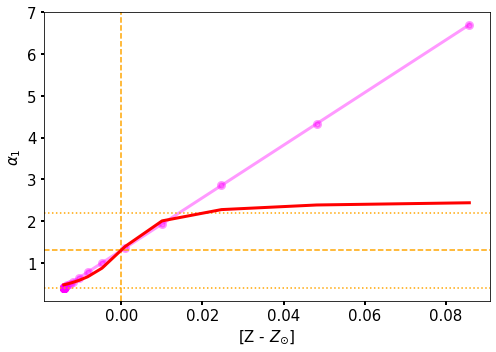

In [36]:
alpha1_Z_plot(Z_massfrac_v, alpha1_Z_list)

<Figure size 432x288 with 0 Axes>

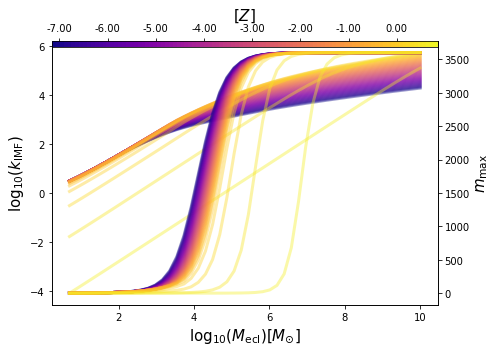

In [37]:
igimf4_obj.k_Z_plot(Z_massfrac_v, k_IMF_Z_list, m_max_Z_list, Mecl_v)

In [55]:
print([m_max_Z_list[i] for i,Z in enumerate(Z_massfrac_v)])

[[1.9826324820799361, 2.538397508443192, 3.2875850684494003, 4.3000376943286875, 5.671914328267675, 7.535759045160476, 10.074454308160405, 13.540546857125053, 19.84738444394732, 30.140686460552935, 46.92041936822461, 74.80370368041218, 121.79012325722076, 201.2811128124064, 333.99628341702515, 547.0180965383116, 864.6437955916685, 1288.6112475040638, 1780.334269810113, 2269.381592473645, 2689.421140409355, 3008.3122521718797, 3228.9870149330322, 3372.3809670695905, 3461.986444681242, 3516.7497035375422, 3549.8433670780337, 3569.7499033901036, 3581.715088196486, 3588.9168585647813, 3593.262239717171, 3595.891877765895, 3597.488147796732, 3598.460091833664, 3599.0536203594393, 3599.417057663264, 3599.640168645934, 3599.777456654899, 3599.8621180342157, 3599.914430572708, 3599.9468143058302, 3599.9668954224567, 3599.9793673526788, 3599.987124727392, 3599.991956276863, 3599.994969340207, 3599.996850578199, 3599.998026449463, 3599.9987621926994, 3599.9992229963627], [1.9826324646958284, 2.5

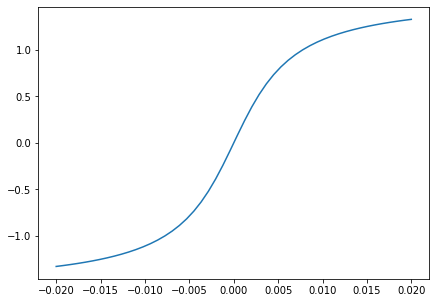

In [38]:
from matplotlib import pyplot as plt
x = np.linspace(-0.02,0.02,num=50)
fig, ax = plt.subplots(1,1, figsize=(7,5))
ax.plot(x, np.arctan(200*x))
plt.show(block=False)

In [39]:
np.pi/2

1.5707963267948966

In [40]:
# IMF_v_list = []
# m_max_list = []
# k_IMF_list = []
# metal_mass_fraction = 1e-1 * 0.0142
# for S in SFR_v:
#     igimf4 = IGIMF4.IGIMF(metal_mass_fraction, S)
    
#     sIMF = igimf4_obj.stellar_IMF(M)
#     print (f"M=%.2e,\t alpha1=%.2f,\t alpha2=%.2f,\t alpha3=%.2f,\t m_max = %.2e,\t [Z] = %.2f"%(M, sIMF[4], sIMF[5], sIMF[6], sIMF[1], igimf4.metallicity))
#     IMF_v = sIMF[2](mstar_v)
#     m_max_list.append(sIMF[1])
#     k_IMF_list.append(sIMF[0])
#     IMF_v_list.append(IMF_v)
#     #igimf4.ECMF_plot(Mecl_v, ECMF_v)

In [41]:
#def sIMF_subplot():
    # import matplotlib.pyplot as plt 
    # import itertools
    # from mpl_toolkits import mplot3d
    # from mpl_toolkits.mplot3d import Axes3D
    # from mpl_toolkits.axes_grid1 import make_axes_locatable
    # cm = plt.cm.get_cmap(name='viridis')
    # levels = np.linspace(Z_sqr_v[0], Z_sqr_v[-1], 100, endpoint=True)
    # CS3 = plt.contourf([[0,0],[0,0]], levels, cmap=cm)
    # plt.clf()
    # num_colors=50
    # currentColors = [cm(1.*i/num_colors) for i in range(num_colors)]
    # currentColor = itertools.cycle(currentColors)
    # fig, axs = plt.subplots(4, 5, figsize=(8,6))
    # for i, ax in enumerate(axs.flat):
    #     for j, Z in enumerate(Z_sqr_mesh):
    #         ax.annotate(r'$M_{ecl}=$%.2e'%(M_ecl_v[i]), xy=(0.5, 0.9), xycoords='axes fraction', horizontalalignment='center', verticalalignment='top', fontsize=7, alpha=0.7)
    #         ax.loglog(mstar_v, [sIMF[j,i](m) for m in mstar_v], color=next(currentColor))
    #         ax.set_ylim(2e-5,1e11)
    #         ax.set_xlim(2e-2,5e2)
    # for nr in range(4):
    #     for nc in range(5):
    #         if nc != 0:
    #             axs[nr,nc].set_yticklabels([])
    #         if nr != 4-1:
    #             axs[nr,nc].set_xticklabels([])
    # axs[4//2,0].set_ylabel(r'$\xi_{stellar}$', fontsize = 15)
    # axs[4-1, 5//2].set_xlabel(r'Masses [$M_{\odot}$]', fontsize = 15)
    # #divider = make_axes_locatable(axs.flat[-1])
    # plt.subplots_adjust(bottom=0., right=0.95, top=1.)
    # cax = plt.axes([0.85, 0.2, 0.025, 0.7])#divider.append_axes("right", size="5%", pad="2%")
    # cbar = plt.colorbar(CS3, cmap=cm, cax=cax, format="%.2f").set_label(label=r'[Z]',size=15)
    # fig.tight_layout(rect=[0,0,0.85,1])
    # fig.subplots_adjust(wspace=0., hspace=0.)
    # fig.savefig('stellarIMF_subplots.pdf')
#sIMF_subplot()

Mtot = 1000.0,	 m_max = 65.26082382611578,	 k(m_max)=298.78726495225186


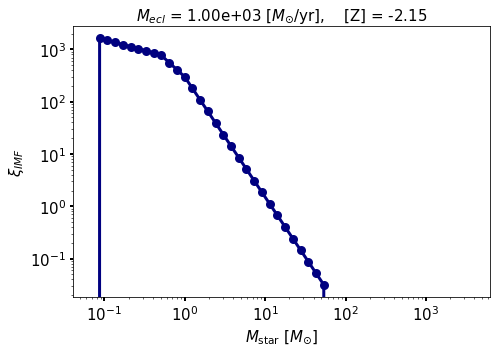

In [42]:
low_Z = 1e-4
Mtot_lowZ_IMF = 1e3
igimf4_metalpoor = IGIMF4.IGIMF(low_Z, downsizing_obj.SFR)
sIMF_lowZ = igimf4_metalpoor.stellar_IMF(Mtot_lowZ_IMF)
igimf4_metalpoor.IMF_plot(mstar_v, sIMF_lowZ[2](mstar_v), Mtot_lowZ_IMF)

Mtot = 3000.0,	 m_max = 0.1909607644970425,	 k(m_max)=1.3989229308100223e-08


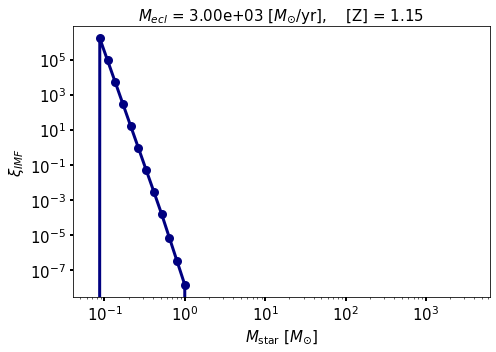

In [43]:
high_Z = 2e-1
Mtot_highZ_IMF = 3e3
igimf4_metalrich = IGIMF4.IGIMF(high_Z, downsizing_obj.SFR)
sIMF_highZ = igimf4_metalrich.stellar_IMF(Mtot_highZ_IMF)
igimf4_metalrich.IMF_plot(mstar_v, sIMF_highZ[2](mstar_v), Mtot_highZ_IMF)

In [44]:
# IMF_Z_v_list = []
# for Z in Z_massfrac_v:
#     IMF_Mecl_v_list = []
#     for M in Mecl_v:
#         igimf4 = IGIMF4.IGIMF(Z, downsizing_obj.SFR)
#         sIMF = igimf4_obj.stellar_IMF(M)
#         IMF_v = sIMF[2](mstar_v)
#         IMF_v_list.append(IMF_v)
#         #igimf4.ECMF_plot(Mecl_v, ECMF_v)
#     IMF_Z_v_list.append(IMF_Mecl_v_list)

In [45]:

def normalization_IMF(IMF, alpha1, alpha2, alpha3, Mtot, lower_lim, mass12, mass23, upper_lim) -> (float, float):
    def integral_IMF(ll, ul, power):
        if ll < ul:
            return np.divide(ul**(1-power) - ll**(1-power), 1-power)
        else:
            return 0.
    k = lambda x: (np.reciprocal(2* integral_IMF(x, mass12, alpha1) 
                                + integral_IMF(mass12, mass23, alpha2) 
                                + integral_IMF(mass23, upper_lim, alpha3)))
    def weighted_IMF(m, x, alpha3):
        return m * IMF(m, alpha3) * k(x)
    func = lambda x: (integr.quad(weighted_IMF, lower_lim, x, args=(x, alpha3))[0] - Mtot)
    sol = optimize.root_scalar(func, x0=0.09, x1=2, rtol=1e-8)
    m_max = sol.root
    return k(m_max), m_max

In [46]:
def integral_IMF(ll, ul, power):
    if ll < ul:
        return np.divide(ul**(1-power) - ll**(1-power), 1-power)
    else:
        return 0.

In [47]:
alpha1 = 1.3
alpha2 = 2.3
alpha3 = 2.3
lower_lim = 0.07
mass12 = 0.5
mass23 = 1
upper_lim = 150

In [48]:
k = (np.vectorize(lambda x: (np.reciprocal(2* integral_IMF(x, mass12, alpha1) 
                            + integral_IMF(mass12, mass23, alpha2) 
                            + integral_IMF(mass23, upper_lim, alpha3)))))

In [49]:
    def k(x):
        if (x > lower_lim and x < mass12):
            return (np.reciprocal(2* integral_IMF(x, mass12, alpha1) 
                                + integral_IMF(mass12, mass23, alpha2) 
                                + integral_IMF(mass23, upper_lim, alpha3)))
        if (x > mass12 and x < mass23):
            return (np.reciprocal(integral_IMF(x, mass23, alpha2) 
                                + integral_IMF(mass23, upper_lim, alpha3)))
        if (x > mass23 and x < upper_lim):
            return (np.reciprocal(integral_IMF(x, upper_lim, alpha3)))
        else:
            return 0.

In [50]:
k_v = [k(m) for m in mstar_v]
#k_v[] = 0.
print(k_v)

[0.11779524661026457, 0.1326607693681772, 0.1504241618562357, 0.17197162157812157, 0.19859071834701952, 0.2322267419847822, 0.27596429582813153, 0.335004655458226, 0.41885761706969027, 0.5467160085981763, 0.7291942855462333, 0.9726461567761624, 1.297498083248858, 1.7310605677835615, 2.3098802637502263, 3.0829207964791023, 4.115883790424947, 5.497113711452369, 7.345729549137974, 9.82293540629639, 13.147955254986593, 17.620849873207053, 23.655860899218236, 31.83138526141412, 42.96722688221784, 58.248575177660804, 79.43416404180944, 109.22532616380362, 151.96518451195584, 215.07738793668975, 312.3594448622919, 472.69389448757664, 768.5197144888051, 1448.1670164294844, 4299.645439000614, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [51]:
def weighted_IMF(m, x, alpha3):
    return m * igimf4_obj.initial_mass_function(m, alpha3) * k(x)

In [52]:
IMFfunc = np.vectorize(lambda x: (integr.quad(weighted_IMF, lower_lim, x, args=(x, alpha3))[0] - Mtot_IMF))

In [53]:
from scipy import optimize
import scipy.integrate as integr
#sol = optimize.root_scalar(IMFfunc, x0=1, x1=20, rtol=1e-8)

In [54]:
#sol.root